Vincy Chirayath Varghese

1201184

## **Title: Deep Learning for Melanoma Classification using pre-trained ResNet-50\.**


## Dataset Selection

**Dataset:** https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset

This dataset, comprises of 13,900 meticulously curated images belonging to two classes **Benign and Malignant** , uniformly sized at 224 x 224 pixels, offer a comprehensive view of melanoma's diverse manifestations.. "Benign" tumors are non-cancerous growths that do not invade nearby tissues or spread to other parts of the body, while "Malignant" tumors are cancerous growths that have the potential to invade surrounding tissues and metastasize to distant sites, posing a significant health risk.  Dive into the intricate world of melanoma, where every pixel holds the potential to redefine early detection.

Melanoma, a deadly form of skin cancer, demands prompt and accurate diagnosis. Leveraging state-of-the-art technology, this dataset empowers researchers and practitioners to develop robust machine-learning models capable of distinguishing between benign and malignant lesions. The images

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np



In [2]:
# # Mount Google Drive if using Colab

# from google.colab import drive
# drive.mount('')

## Data Preprocessing

**Image Loading and Transformation:**
- Load images from the specified directories (train and test).
- For the training dataset, several data augmentation techniques are applied to increase the diversity of the training data. These techniques include random rotation, horizontal flip, and vertical flip. These transformations help the model generalize better by exposing it to variations in the input data.
- For the test dataset, only normalization is applied without any data augmentation. This ensures that the test images remain in their original form for evaluation.

**Normalization:**
- Both the training and test images are normalized.
- Normalization is a common preprocessing step in deep learning where pixel values are scaled to have a mean of 0 and a standard deviation of 1. This helps in stabilizing and speeding up the training process.

**Data Loading and Batching:**
- After applying transformations, the images are loaded into PyTorch DataLoader objects, which facilitate efficient data loading and batching during training and evaluation.
- The training and test datasets are split into batches of a specified size (batch_size).
- Batching allows the model to process multiple images simultaneously, improving training efficiency.

These preprocessing steps ensure that the input data is properly prepared and formatted for training and evaluation. Data augmentation helps in improving the model's generalization ability, while normalization ensures that the input data has a consistent scale and distribution. Finally, data loading and batching optimize the training process by efficiently feeding data to the model in manageable chunks.









In [4]:
##  # Define transformations for data augmentation
train_transform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
# Load the train and test data
train_dataset = torchvision.datasets.ImageFolder(root='melanoma/train', transform=train_transform)
test_dataset = torchvision.datasets.ImageFolder(root='melanoma/train', transform=test_transform)

In [5]:
# Define data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

**Code Explanation**

**Transformations for Data Augmentation:**

For the training dataset (train_transform)

- **RandomRotation(20):** Randomly rotates the image by a maximum of 20 degrees. This helps the model become invariant to small rotations in the input images.
- **RandomHorizontalFlip():** Randomly flips the image horizontally with a probability of 0.5. This introduces variations in the orientation of the objects in the image.
- **RandomVerticalFlip():** Randomly flips the image vertically with a probability of 0.5. This further increases the diversity of the training data.
- **ToTensor():** Converts the image to a PyTorch tensor, which is the standard format for input data in PyTorch models.
- **Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)):** Normalizes the pixel values of the image to have a mean of 0.5 and a standard deviation of 0.5 for each channel. This standardizes the input data, making it easier for the model to learn.

**Data Loaders:**
- After defining the transformations, the code creates data loaders (train_loader and test_loader) to load the preprocessed images into batches for training and testing the model.

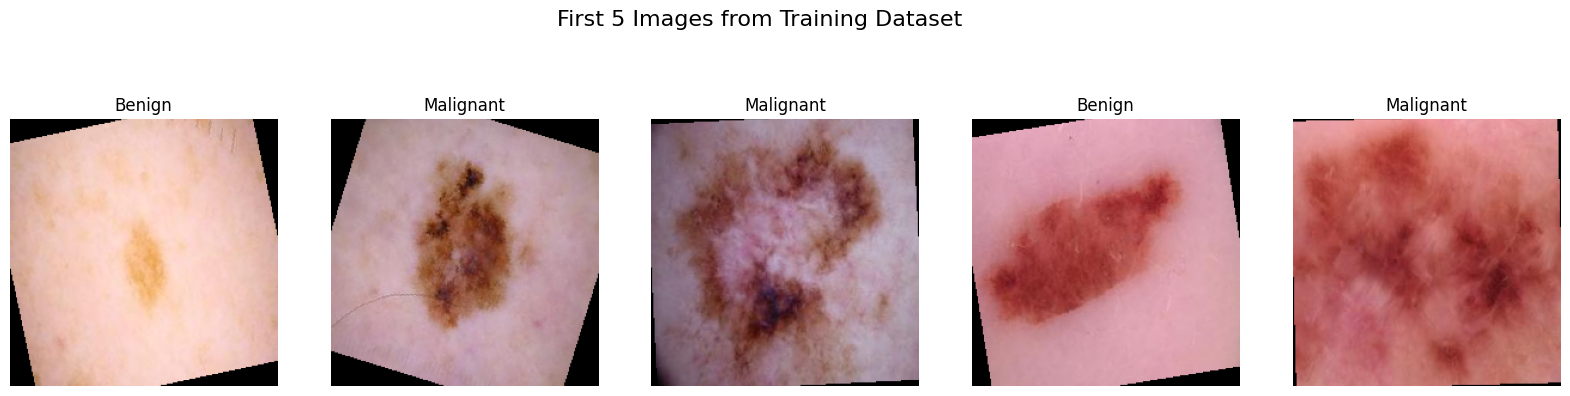

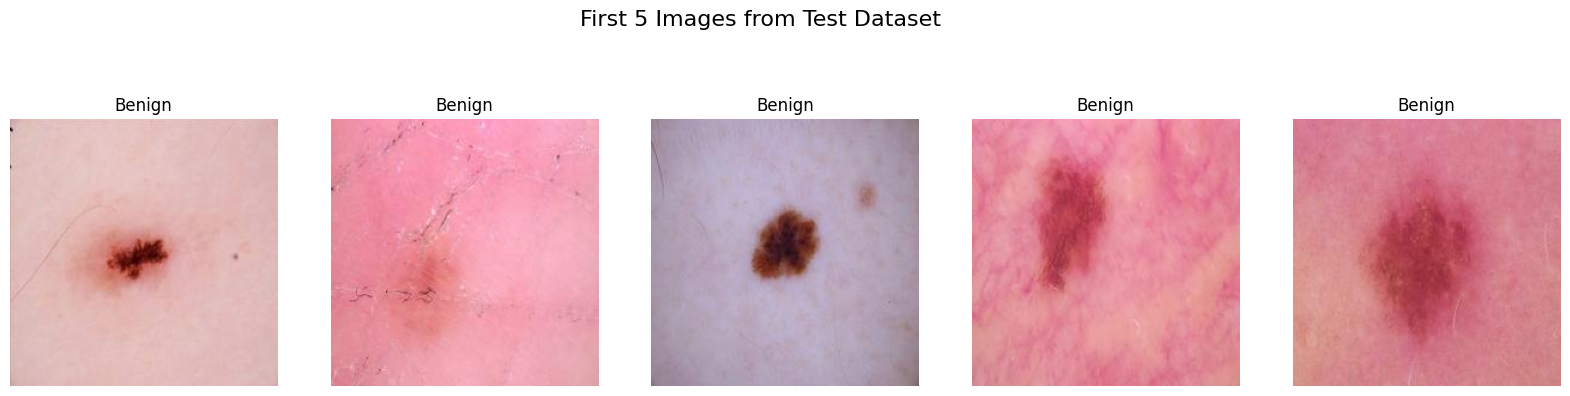

In [6]:

# Display sample images from train and test loaders
def show_images(loader, dataset_name):
    classes = loader.dataset.classes
    data_iter = iter(loader)
    images, labels = data_iter.__next__()
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    for idx, image in enumerate(images[:5]):
        image = image / 2 + 0.5
        np_image = image.numpy()
        axes[idx].imshow(np.transpose(np_image, (1, 2, 0)))
        axes[idx].set_title(classes[labels[idx]])
        axes[idx].axis('off')
    fig.suptitle(f"First 5 Images from {dataset_name} Dataset", fontsize=16)
    plt.show()

# Show sample images from train loader
show_images(train_loader, "Training")

# Show sample images from test loader
show_images(test_loader, "Test")


## Model Selection and Architecture

ResNet50 is a deep convolutional neural network (CNN) created by Microsoft Research in 2015. It's a variant of the ResNet architecture, with 50 layers. ResNet50 uses residual connections, enabling deeper architectures without vanishing gradients. Its structure includes convolutional layers for feature extraction, identity and convolutional blocks for processing, and fully connected layers for classification.

The architecture of ResNet50 is divided into four main parts: the convolutional layers, the identity block, the convolutional block, and the fully connected layers. The convolutional layers are responsible for extracting features from the input image, while the identity block and convolutional block are responsible for processing and transforming these features. Finally, the fully connected layers are used to make the final classification.

The convolutional layers in ResNet50 consist of several convolutional layers followed by batch normalization and ReLU activation. These layers are responsible for extracting features from the input image, such as edges, textures, and shapes. The convolutional layers are followed by max pooling layers, which reduce the spatial dimensions of the feature maps while preserving the most important features.

The identity block and convolutional block are the key building blocks of ResNet50. The identity block is a simple block that passes the input through a series of convolutional layers and adds the input back to the output. This allows the network to learn residual functions that map the input to the desired output. The convolutional block is similar to the identity block, but with the addition of a 1x1 convolutional layer that is used to reduce the number of filters before the 3x3 convolutional layer.

The final part of ResNet50 is the fully connected layers. These layers are responsible for making the final classification. The output of the final fully connected layer is fed into a softmax activation function to produce the final class probabilities.

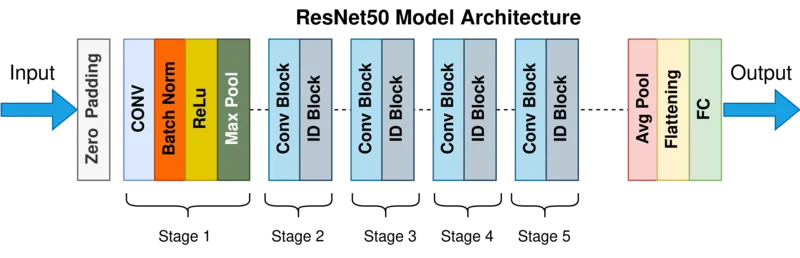

In [7]:
# Define the model
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 2)
)

C:\Users\jithi\OneDrive\Desktop\Pytorch\Pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jithi\OneDrive\Desktop\Pytorch\Pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**Code Explanation**

**Define the model:**

- **model = models.resnet50(pretrained=True):** This line creates an instance of the ResNet-50 model provided by PyTorch's torchvision library. The pretrained=True argument loads a pre-trained version of the ResNet-50 model, which has been trained on the ImageNet dataset.
- **for param in model.parameters():** param.requires_grad = False: This loop iterates over all parameters in the model and sets requires_grad attribute to False, which means that the parameters will not be updated during training (i.e., frozen). We freeze the pre-trained layers to prevent them from being retrained and to use them as fixed feature extractors.

**Modify the fully connected layer (classifier) of the model:**

- **num_ftrs = model.fc.in_features:** Retrieves the number of input features of the last fully connected layer (classifier) in the ResNet-50 model. This is necessary for defining the new classifier.

- **model.fc = nn.Sequential(...):** Replaces the last fully connected layer (classifier) of the ResNet-50 model with a new classifier defined as a sequence of layers.

In this case, it consists of:

- **nn.Linear(num_ftrs, 256):** Linear layer with num_ftrs input features and 256 output features.

- **nn.ReLU():** Rectified Linear Unit (ReLU) activation function.

- **nn.Dropout(0.5):** Dropout layer with a dropout probability of 0.5, which helps prevent overfitting.

- **nn.Linear(256, 2):** Final linear layer with 256 input features and 2 output features, corresponding to the number of classes in the dataset

**Define loss function and optimizer:**

- **criterion = nn.CrossEntropyLoss():** Defines the loss function, which is the cross-entropy loss. This loss function is commonly used for multi-class classification tasks.

- **optimizer = optim.Adam(model.parameters(), lr=0.0001):** Defines the optimizer used for training the model, which is Adam optimizer. It optimizes the parameters (weights) of the model using the gradients computed during backpropagation. The learning rate (lr) is set to 0.0001.

**Move model to GPU if available:**

- **device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"):** Determines whether a GPU is available. If a GPU is available, it sets the device to the GPU (cuda:0); otherwise, it sets it to the CPU (cpu).

- **model.to(device):** Moves the model to the specified device (GPU or CPU) to enable faster computation on the available hardware. If GPU is available, the model will be trained on GPU for faster training.

## Model Training

In [9]:
# Training the model
num_epochs = 20
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {(correct/total)*100:.2f}%")



Epoch 1/20, Train Loss: 0.4513, Test Loss: 0.3292, Test Accuracy: 85.79%
Epoch 2/20, Train Loss: 0.3511, Test Loss: 0.3068, Test Accuracy: 86.40%
Epoch 3/20, Train Loss: 0.3364, Test Loss: 0.2991, Test Accuracy: 87.05%
Epoch 4/20, Train Loss: 0.3215, Test Loss: 0.3037, Test Accuracy: 86.67%
Epoch 5/20, Train Loss: 0.3261, Test Loss: 0.2914, Test Accuracy: 87.04%
Epoch 6/20, Train Loss: 0.3183, Test Loss: 0.3135, Test Accuracy: 86.38%
Epoch 7/20, Train Loss: 0.3162, Test Loss: 0.2937, Test Accuracy: 87.15%
Epoch 8/20, Train Loss: 0.3089, Test Loss: 0.2845, Test Accuracy: 87.58%
Epoch 9/20, Train Loss: 0.3046, Test Loss: 0.2827, Test Accuracy: 87.59%
Epoch 10/20, Train Loss: 0.3072, Test Loss: 0.3010, Test Accuracy: 86.73%
Epoch 11/20, Train Loss: 0.2985, Test Loss: 0.2771, Test Accuracy: 87.50%
Epoch 12/20, Train Loss: 0.2979, Test Loss: 0.2721, Test Accuracy: 88.00%
Epoch 13/20, Train Loss: 0.2920, Test Loss: 0.2759, Test Accuracy: 88.06%
Epoch 14/20, Train Loss: 0.2964, Test Loss: 0.2

**Code Explanation**

**Training Loop:** The model is put into training mode (model.train()) to enable gradient calculation and parameter optimization.

Inside the loop over the specified number of epochs:

- For each batch of inputs and labels from the training loader (train_loader), the gradients are zeroed (optimizer.zero_grad()), forward pass is performed (outputs = model(inputs)), loss is computed using the specified criterion (loss = criterion(outputs, labels)), backward pass is performed (loss.backward()), and the optimizer updates the model parameters based on the computed gradients (optimizer.step()).

- The training loss for the epoch is calculated by summing up the batch losses and dividing by the total number of training samples (epoch_loss = running_loss / len(train_loader.dataset)). The epoch loss is then appended to the list train_losses.

**Evaluation Loop:** The model is put into evaluation mode (model.eval()) to disable gradient calculation and dropout during inference.

Inside the loop:

- For each batch of inputs and labels from the test loader (test_loader), forward pass is performed (outputs = model(inputs)), and the loss is computed using the specified criterion (loss = criterion(outputs, labels)).

- The test loss is calculated similarly to the training loss and stored in the list test_losses.

- Additionally, the number of correctly classified samples and the total number of samples in the test dataset are computed to calculate the test accuracy.

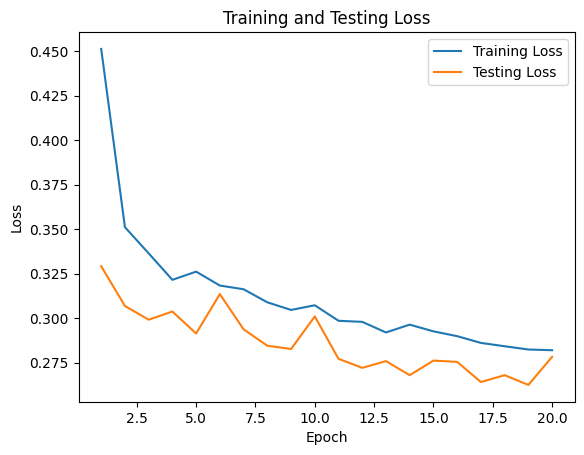

In [10]:
# Plot training and testing loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()



### Training and Testing Loss illustrates the performance of a machine learning model during training and testing phases. 

**Training Loss (Blue Line):**
Initially, the training loss starts very high (around 0.45).
As the model trains, the training loss decreases sharply in the early epochs.
After the initial drop, the training loss gradually continues to decrease but at a slower rate.

**Testing Loss (Orange Line):**
The testing loss starts lower than the initial training loss (around 0.275).
It shows some fluctuations but overall exhibits a declining trend.
The testing loss remains consistently lower than the training loss throughout most of the epochs.

**Findings:**

The model is learning effectively during training, as indicated by the decreasing training loss.
The testing loss also decreases, suggesting that the model generalizes well to unseen data.
The gap between training and testing loss indicates that the model may not be overfitting.

## Model Evaluation

In [11]:
# Evaluate the model
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())



In [12]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels, target_names=train_dataset.classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[5225 1064]
 [ 377 5213]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.83      0.88      6289
   Malignant       0.83      0.93      0.88      5590

    accuracy                           0.88     11879
   macro avg       0.88      0.88      0.88     11879
weighted avg       0.88      0.88      0.88     11879



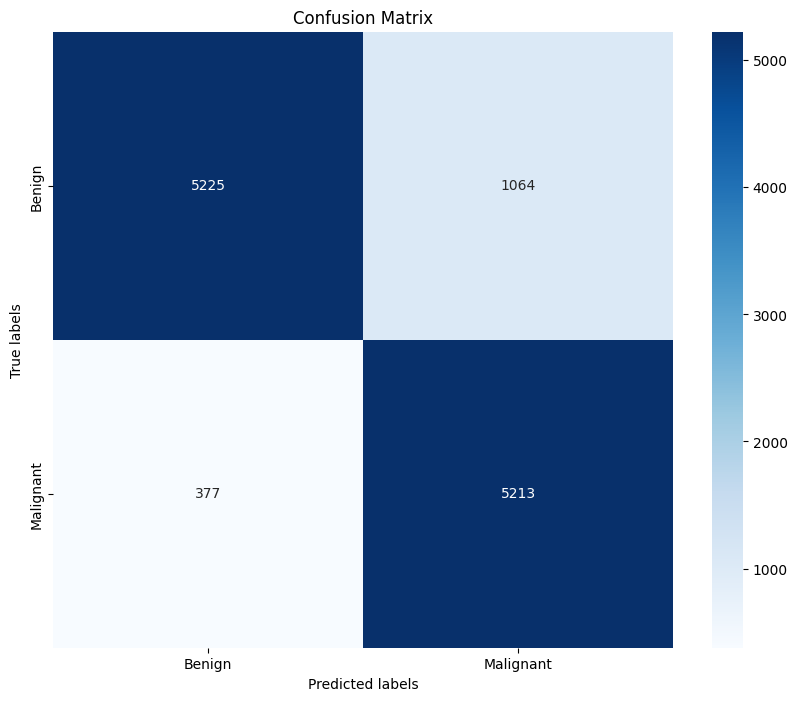

In [13]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.classes,
            yticklabels=train_dataset.classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


The model demonstrates robust performance in classifying benign and malignant tumors. With an overall accuracy of 88%, it achieves a balanced F1-score of 0.88 for both classes. The confusion matrix reveals that while there are some misclassifications, the model shows a relatively balanced performance with high precision and recall values for both classes. This suggests that the model is effective in distinguishing between benign and malignant tumors, which is crucial for accurate medical diagnoses.

